<a href="https://colab.research.google.com/github/jinkim-com/qm2coursework/blob/main/NLP_Trump_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob
!python -m spacy download en_core_web_sm

import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob
import re

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')
nltk.download('punkt_tab')


Importing the CSV files

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Trump_2020.csv')

# Cleaning the Data

**Our data may still has some unwanted characters such as \n. This means we need to clean the data:**


In [ ]:
# Removing all isntances of \n

df['Speech'] = df['Speech'].str.replace('\n', '', regex=False)

We also need to check that all the speeches are before the election (and are therefore part of the campaign). We can then remove unwanted speeches from the data.

In [ ]:
df.sort_values(by=['Date'], inplace=True, ascending=False)
df.head()

,Speech,Date,Economy,Month,terrorism,Supreme Court,Healthcare,Foreign Policy,Mean Sentence Length (Words)
36,Hello everybody. Hello Orlando. Hello Sanford....,2020-12-10,10,12,3,6,9,21,15.203065
21,"Well, I thank you very much. So I want to star...",2020-12-09,10,12,4,7,12,29,14.991304
40,Thank you. What a nice group. Thank you very ...,2020-10-16,3,10,0,2,14,4,15.841924
39,"Thank you very much. Thank you. Let’s see, it’...",2020-10-15,10,10,2,11,11,20,14.300178
38,"Thank you very much. Thank you very much, eve...",2020-10-14,15,10,3,6,6,45,17.775510


# Finding the frequency of regular expressions affliated with voter issues

In [ ]:
# We created a function that will take a list of words which are affliated with topics of voter importance and display a table of how many times they collectively occcur in each speech.

def count_words(words) :
    # Creating a table which shows the date and frequency of the words being used
    df[f'{words[0]}'] = df['Speech'].apply(lambda x: sum(len(re.findall(r'\b' + word + r'\b', x, re.IGNORECASE)) for word in words))
    print(df[['Date',f'{words[0]}']])
    capitalised_words = [word.capitalize() for word in words]
    title = capitalised_words[0]

    # Creating the graph
    df['Date'] = pd.to_datetime(df['Date']) # Convert 'Date' column to datetime
    df['Month'] = df['Date'].dt.month
    monthly=df.groupby('Month')[f'{words[0]}'].sum()
    monthly.plot()
    plt.xlabel("Month")
    plt.ylabel(f"No. of times the {title} was mentioned")
    plt.title(f"Frequency of {title} mentioned in Trump's campaign speeches in 2016")


         Date  Economy
0  2020-01-28       13
1  2020-01-30       15
2  2020-10-02        4
3  2020-02-20       11
4  2020-02-21        3
5  2020-02-21        7
6  2020-02-28        1
7  2020-02-03       12
8  2020-06-21        7
9  2020-06-23        7
10 2020-08-14        4
11 2020-08-17       22
12 2020-08-17       12
13 2020-08-20        7
14 2020-08-24        7
15 2020-08-27       11
16 2020-08-28        8
17 2020-03-09       11
18 2020-08-09       20
19 2020-08-09        2
20 2020-10-09       11
21 2020-12-09       10
22 2020-09-13        6
23 2020-09-14        5
24 2020-09-17       17
25 2020-09-18        1
26 2020-09-19        6
27 2020-09-21       10
28 2020-09-21       10
29 2020-09-22        9
30 2020-09-24        3
31 2020-09-25        2
32 2020-09-26        6
33 2020-09-27        5
34 2020-09-30        7
35 2020-10-10        2
36 2020-12-10       10
37 2020-10-13        6
38 2020-10-14       15
39 2020-10-15       10
40 2020-10-16        3


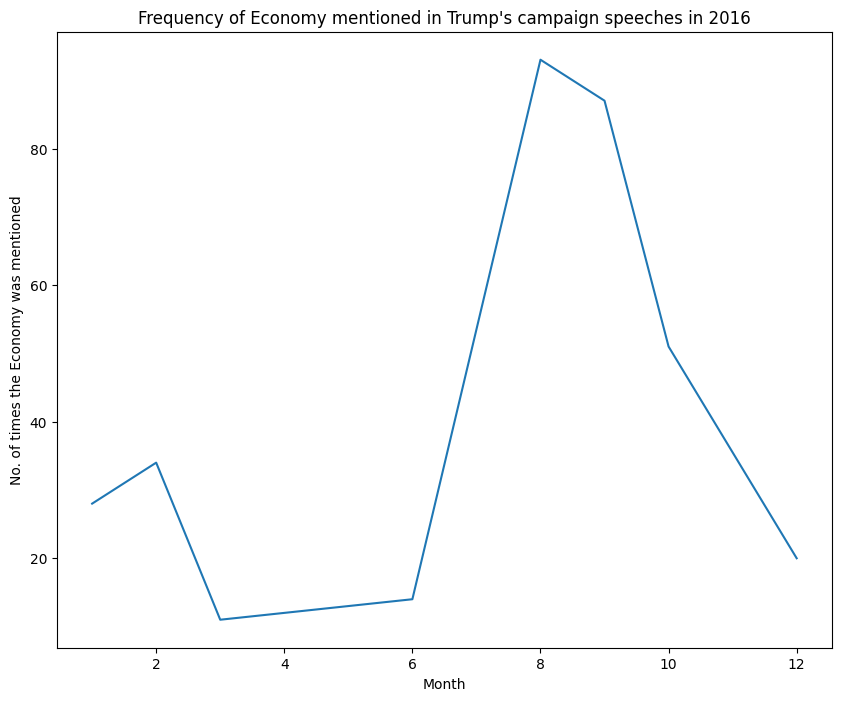

In [ ]:
economy_words = ['Economy', 'Economic', 'Inflation', 'Tax']
count_words(economy_words)


         Date  terrorism
0  2020-01-28          2
1  2020-01-30          2
2  2020-10-02          1
3  2020-02-20          1
4  2020-02-21          1
5  2020-02-21          1
6  2020-02-28          1
7  2020-02-03          5
8  2020-06-21          0
9  2020-06-23          0
10 2020-08-14          0
11 2020-08-17          0
12 2020-08-17          1
13 2020-08-20          2
14 2020-08-24          0
15 2020-08-27          3
16 2020-08-28          2
17 2020-03-09          1
18 2020-08-09          4
19 2020-08-09          0
20 2020-10-09          2
21 2020-12-09          4
22 2020-09-13          4
23 2020-09-14          0
24 2020-09-17          3
25 2020-09-18          4
26 2020-09-19          1
27 2020-09-21          3
28 2020-09-21          0
29 2020-09-22          2
30 2020-09-24          3
31 2020-09-25          0
32 2020-09-26          2
33 2020-09-27          2
34 2020-09-30          3
35 2020-10-10          0
36 2020-12-10          3
37 2020-10-13          3
38 2020-10-14          3


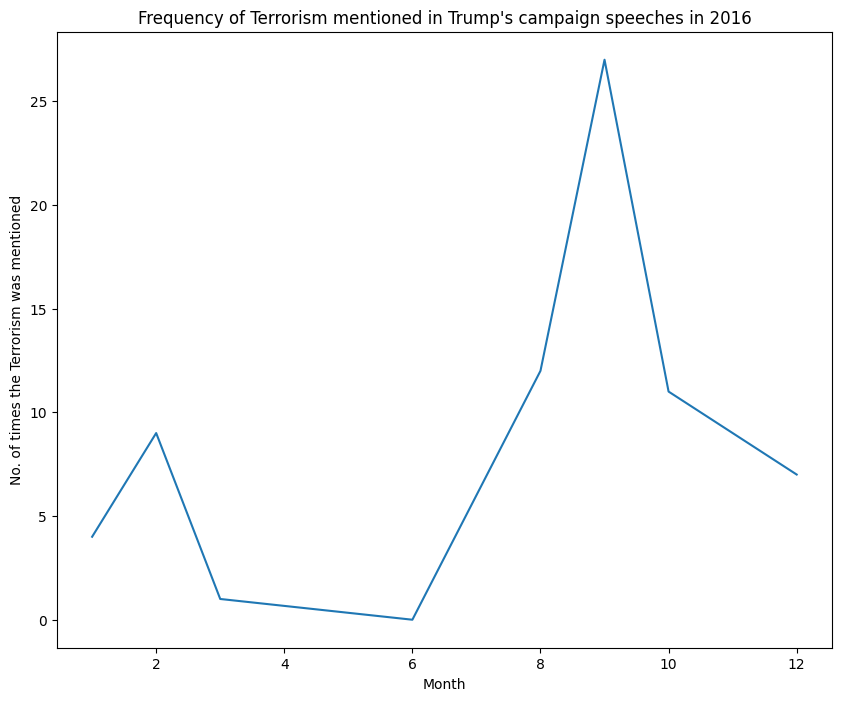

In [ ]:
terrorism_words = ['terrorism', 'terrorists', 'attacks']
count_words(terrorism_words)

         Date  Supreme Court
0  2020-01-28              2
1  2020-01-30              1
2  2020-10-02              1
3  2020-02-20              3
4  2020-02-21              3
5  2020-02-21              1
6  2020-02-28              0
7  2020-02-03              1
8  2020-06-21              6
9  2020-06-23              3
10 2020-08-14              0
11 2020-08-17              0
12 2020-08-17              1
13 2020-08-20              2
14 2020-08-24              2
15 2020-08-27              1
16 2020-08-28              1
17 2020-03-09              0
18 2020-08-09              0
19 2020-08-09              0
20 2020-10-09              1
21 2020-12-09              7
22 2020-09-13              2
23 2020-09-14              0
24 2020-09-17              1
25 2020-09-18              5
26 2020-09-19             10
27 2020-09-21              9
28 2020-09-21              8
29 2020-09-22              8
30 2020-09-24              4
31 2020-09-25              2
32 2020-09-26              8
33 2020-09-27 

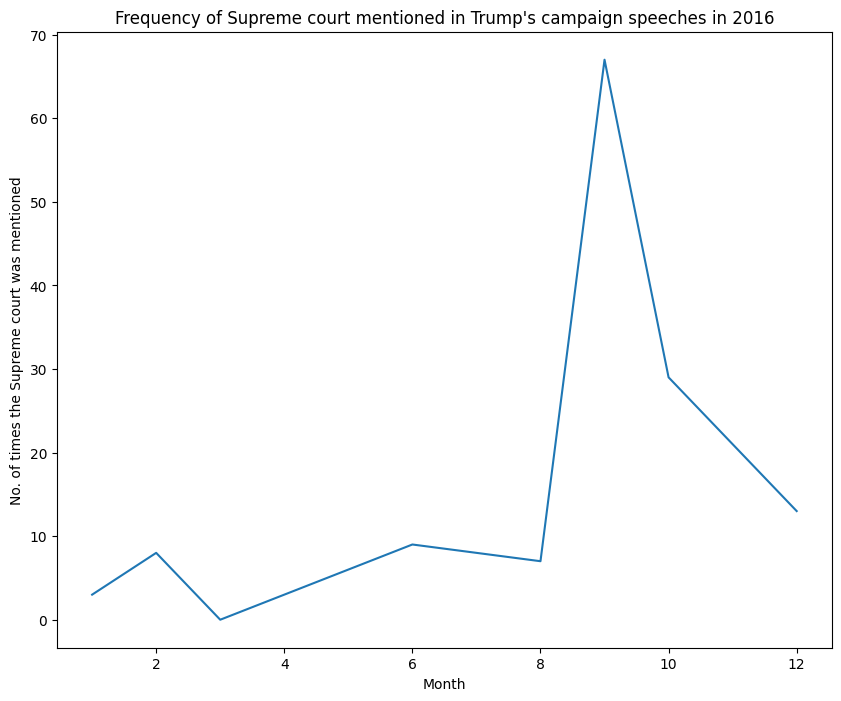

In [ ]:
supreme_court_words = ['Supreme Court', 'Supreme Court Justice', 'Stras']
count_words(supreme_court_words)

         Date  Healthcare
0  2020-01-28           3
1  2020-01-30          20
2  2020-10-02          10
3  2020-02-20          15
4  2020-02-21          26
5  2020-02-21           5
6  2020-02-28          15
7  2020-02-03          12
8  2020-06-21          12
9  2020-06-23          10
10 2020-08-14           0
11 2020-08-17           7
12 2020-08-17           7
13 2020-08-20           3
14 2020-08-24           5
15 2020-08-27           4
16 2020-08-28           6
17 2020-03-09          10
18 2020-08-09           8
19 2020-08-09           0
20 2020-10-09           8
21 2020-12-09          12
22 2020-09-13           4
23 2020-09-14           0
24 2020-09-17          11
25 2020-09-18           3
26 2020-09-19          19
27 2020-09-21           6
28 2020-09-21           8
29 2020-09-22          15
30 2020-09-24          11
31 2020-09-25           3
32 2020-09-26           8
33 2020-09-27          11
34 2020-09-30           4
35 2020-10-10           8
36 2020-12-10           9
37 2020-10-1

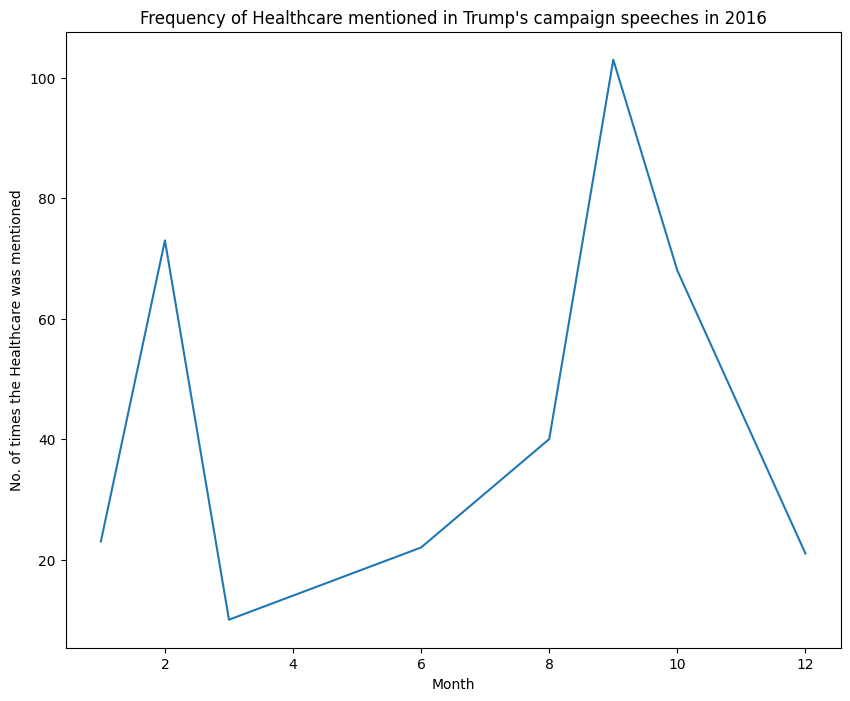

In [ ]:
healthcare_words = ['Healthcare', 'Affordable Care Act', 'COVID', 'vaccine', 'coronavirus', 'Obamacare', 'health insurance']
count_words(healthcare_words)

         Date  Foreign Policy
0  2020-01-28               1
1  2020-01-30              22
2  2020-10-02               7
3  2020-02-20               6
4  2020-02-21              11
5  2020-02-21              10
6  2020-02-28               3
7  2020-02-03               1
8  2020-06-21              13
9  2020-06-23              13
10 2020-08-14               3
11 2020-08-17              34
12 2020-08-17              41
13 2020-08-20              14
14 2020-08-24              26
15 2020-08-27              18
16 2020-08-28              28
17 2020-03-09              36
18 2020-08-09              36
19 2020-08-09               4
20 2020-10-09              49
21 2020-12-09              29
22 2020-09-13              21
23 2020-09-14               3
24 2020-09-17              42
25 2020-09-18              19
26 2020-09-19              41
27 2020-09-21              10
28 2020-09-21              56
29 2020-09-22              13
30 2020-09-24              15
31 2020-09-25               4
32 2020-09

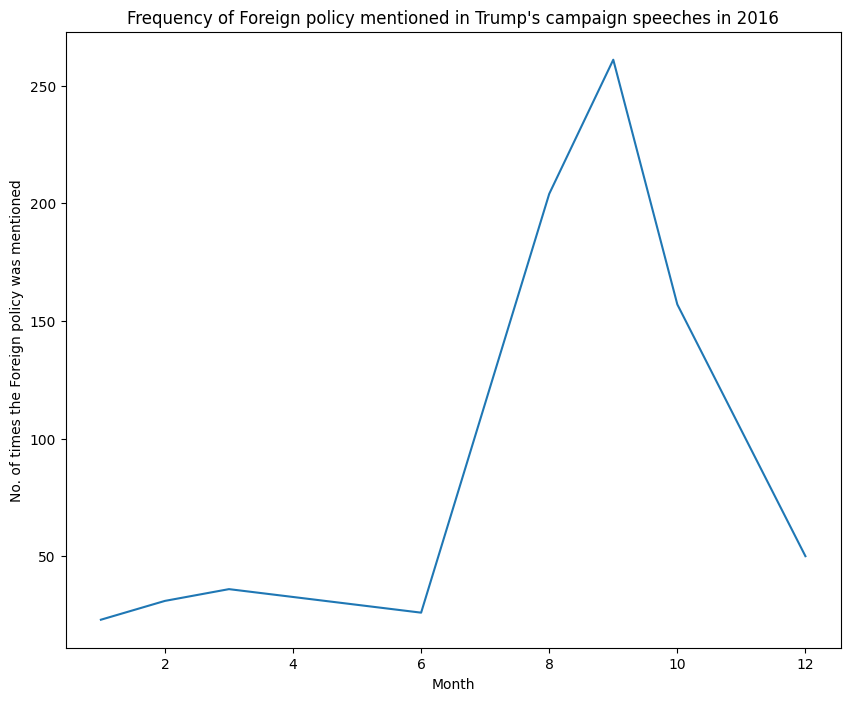

In [ ]:
foreign_policy_words = ['Foreign Policy', 'tariffs', 'China', 'Putin', 'Xi']
count_words(foreign_policy_words)

# Finding average sentence length

In [ ]:
# We created a function to find the length of each sentence
def sentence_length():
    for speech in df['Speech']:
        all_sentence_lengths = []
        for sentence in doc.sents:
            # Exclude the full stop from the word count
            num_words = len([token for token in sentence if not token.is_punct])
            all_sentence_lengths.append(num_words)

    return all_sentence_lengths

# Creating a table of summary statistics for the sentence lengths
word_count = pd.Series(sentence_length())
summary_stats = word_count.describe().to_frame().T
summary_stats.index = ['Sentence Length (Words)']

print(summary_stats)

                         count       mean       std  min  25%  50%   75%   max
Sentence Length (Words)  636.0  11.413522  8.333808  1.0  6.0  9.0  15.0  62.0


In [132]:
def avg_sentence_length_per_speech(df):
    speech_sentence_lengths = []
    for speech in df['Speech']:
        sentences = nltk.sent_tokenize(speech)  # Sentence segmentation with NLTK
        sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
        avg_length = np.mean(sentence_lengths) if sentence_lengths else 0  # Handle empty speeches
        speech_sentence_lengths.append(avg_length)

    return pd.Series(speech_sentence_lengths, index=df.index)

avg_lengths_series = avg_sentence_length_per_speech(df)

# We then created a new column in the dataframe with the Average Sentence Length per Speech
df['Mean Sentence Length (Words)'] = avg_lengths_series
# df = df.drop(columns=['Mean Sentence Length(Words)'])

sent_summary_stats = df['Mean Sentence Length (Words)'].describe().to_frame().T
sent_summary_stats.index = ['Mean Sentence Length (Words)']


In [135]:
sent_summary_stats

,count,mean,std,min,25%,50%,75%,max
Mean Sentence Length (Words),41.0,14.543913,1.674389,12.348837,13.157321,14.300178,15.695712,18.962085
